## **10-05 나이브 베이즈 분류기(Naive Bayes Classifier)**
---

텍스트 분류를 위해 전통적으로 사용되는 분류기로 나이브 베이즈 분류기가 있습니다. 나이브 베이즈 분류기는 인공 신경망 알고리즘에는 속하지 않지만, 머신 러닝의 주요 알고리즘으로 분류에 있어 준수한 성능을 보여주는 것으로 알려져 있습니다.

---
### **1. 베이즈의 정리(Bayes' theorem)를 이용한 분류 메커니즘**

나이브 베이즈 분류기를 이해하기 위해서는 우선 **베이즈의 정리(Bayes' theorem)** 를 이해할 필요가 있습니다. 베이즈 정리는 조건부 확률을 계산하는 방법 중 하나입니다.

$P(A)$가 A가 일어날 확률,
$P(B)$가 B가 일어날 확률,
$P(B|A)$가 A가 일어나고나서 B가 일어날 확률,
$P(A|B)$가 B가 일어나고나서 A가 일어날 확률이라고 해봅시다. 이때
를 쉽게 구할 수 있는 상황이라면, 아래와 같은 식을 통해 $P(A|B)$를 구할 수 있습니다.  
  
 $$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$


나이브 베이즈 분류기는 이러한 베이즈 정리를 이용하여 텍스트 분류를 수행합니다. 예를 들어서 나이브 베이즈 분류기를 통해서 스팸 메일 필터를 만들어본다고 합시다. 입력 텍스트(메일의 본문)이 주어졌을 때, 입력 텍스트가 정상 메일인지 스팸 메일인지 구분하기 위한 확률을 이와 같이 표현할 수 있습니다.

**P(정상 메일 | 입력 텍스트) = 입력 텍스트가 있을 때 정상 메일일 확률**  
**P(스팸 메일 | 입력 텍스트) = 입력 텍스트가 있을 때 스팸 메일일 확률**
  
이를 베이즈의 정리에 따라서 식을 표현하면 이와 같습니다.
  
**P(정상 메일 | 입력 텍스트) = (P(입력 텍스트 | 정상 메일) × P(정상 메일)) / P(입력 텍스트)**  
**P(스팸 메일 | 입력 텍스트) = (P(입력 텍스트 | 스팸 메일) × P(스팸 메일)) / P(입력 텍스트)**

입력 텍스트가 주어졌을 때, P(정상 메일 | 입력 텍스트)가 P(스팸 메일 | 입력 텍스트)보다 크다면 정상 메일이라고 볼 수 있으며, 그 반대라면 스팸 메일이라고 볼 수 있습니다. 그런데 두 확률 모두 식을 보면 P(입력 텍스트)를 분모로 하고 있음을 알 수 있습니다. 그렇기 때문에 분모를 양쪽에서 제거하여 식을 간소화합니다.

**P(정상 메일 | 입력 텍스트) = P(입력 텍스트 | 정상 메일) × P(정상 메일)**  
**P(스팸 메일 | 입력 텍스트) = P(입력 텍스트 | 스팸 메일) × P(스팸 메일)**

입력 텍스트는 메일의 본문을 의미한다고 언급했습니다. 그런데 메일의 본문을 어떻게 나이브 베이즈 분류기의 입력으로 사용할 수 있을까요? 메일의 본문을 단어 토큰화하여 이 단어들을 나이브 베이즈의 분류기의 입력으로 사용합니다.

만약 메일의 본문에 있는 단어가 3개라고 가정해보겠습니다. 기본적으로 나이브 베이즈 분류기는 모든 단어가 독립적이라고 가정합니다. 메일의 본문에 있는 단어 3개를 $w_1$, $w_2$, $w_3$라고 표현한다면 결국 나이브 베이즈 분류기의 정상 메일일 확률과 스팸 메일일 확률을 구하는 식은 아래와 같습니다.

**P(정상 메일 | 입력 텍스트) = P($w_1$ | 정상 메일) × P($w_2$ | 정상 메일) × P($w_3$ | 정상 메일) × P(정상 메일)**  
**P(스팸 메일 | 입력 텍스트) = P($w_1$ | 스팸 메일) × P($w_2$ | 스팸 메일) × P($w_3$ | 스팸 메일) × P(스팸 메일)**  


식을 보고 눈치채신 분들도 있겠지만, 나이브 베이즈 분류기에서 토큰화 이전의 단어의 순서는 중요하지 않습니다. 즉, BoW와 같이 **단어의 순서를 무시하고 오직 빈도수만을 고려** 합니다. 이제 실제 단어들로 이루어진 예제를 통해서 확률을 구해보겠습니다.

---
### **2. 스팸 메일 분류기(Spam Detection)**

앞서 배운 나이브 베이즈 분류식을 가지고, 입력 텍스트로부터 해당 텍스트가 정상 메일인지 스팸 메일인지를 구분하는 작업을 해보겠습니다. 아래와 같은 훈련 데이터가 있다고 가정하겠습니다.

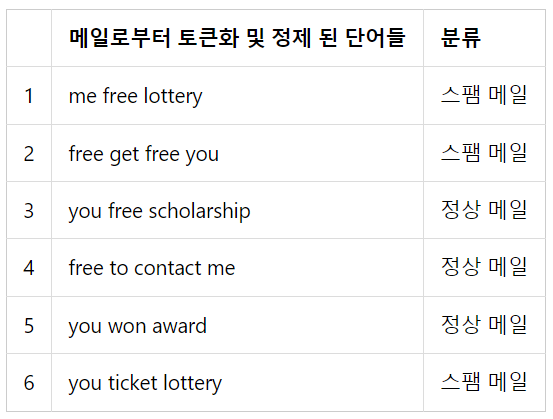

이때 `you free lottery`라는 입력 텍스트에 대해서 정상 메일일 확률과 스팸 메일일 확률 각각을 구해보겠습니다.

**P(정상 메일 | 입력 텍스트) = P(you | 정상 메일) × P(free | 정상 메일) × P(lottery | 정상 메일) × P(정상 메일)**  
**P(스팸 메일 | 입력 텍스트) = P(you | 스팸 메일) × P(free | 스팸 메일) × P(lottery | 스팸 메일) × P(스팸 메일)**  
  
**P(정상 메일) = P(스팸 메일) = 총 메일 6개 중 3개 = 0.5**
위 예제에서는 P(정상 메일)과 P(스팸 메일)의 값은 같으므로, 두 식에서 두 개의 확률은 생략이 가능합니다.

**P(정상 메일 | 입력 텍스트) = P(you | 정상 메일) × P(free | 정상 메일) × P(lottery | 정상 메일)**  
**P(스팸 메일 | 입력 텍스트) = P(you | 스팸 메일) × P(free | 스팸 메일) × P(lottery | 스팸 메일)**  

P(you | 정상 메일)을 구하는 방법은 정상 메일에 등장한 모든 단어의 빈도 수의 총합을 분모로하고, 정상 메일에서 you가 총 등장한 빈도의 수를 분자로 하는 것입니다. 이 경우에는 2/10 = 0.2가 됩니다. 이와 같은 원리로 식을 전개하면 이와 같습니다.

**P(정상 메일 | 입력 텍스트) = 2/10 × 2/10 × 0/10 = 0**  
**P(스팸 메일 | 입력 텍스트) = 2/10 × 3/10 × 2/10 = 0.012**  

결과적으로 **P(정상 메일 | 입력 텍스트) < P(스팸 메일 | 입력 텍스트)이므로 입력 텍스트 you free lottery는 스팸 메일로 분류** 됩니다.

그런데 예제를 보니 이상한 점이 보입니다. 물론, 직관적으로 보기에도 you, free, lottery라는 단어가 스팸 메일에서 빈도수가 더 높기때문에 스팸 메일인 확률이 더 높은 것은 확실합니다. 그러나 입력 텍스트에 대해서 단, 하나의 단어라도 훈련 텍스트에 없었다면 확률 전체가 0이 되는 것은 지나친 일반화입니다. 이 경우에는 정상 메일에 lottery가 단 한 번도 등장하지 않았고, 그 이유로 정상 메일일 확률 자체가 0%가 되어버렸습니다.

이를 방지하기 위해서 나이브 베이즈 분류기에서는 각 단어에 대한 **확률의 분모, 분자에 전부 숫자를 더해서 분자가 0이 되는 것을 방지하는 라플라스 스무딩을 사용하기도** 합니다.

---
### **3. 뉴스그룹 데이터 분류하기(Classification of 20 News Group with Naive Bayes Classifier)**  



사이킷 런에서는 Twenty Newsgroups이라고 불리는 **20개의 다른 주제** 를 가진 **18,846개의 뉴스그룹 데이터** 를 제공합니다. (토픽 모델링의 LSA 챕터에서 사용했던 데이터와 동일한 데이터.) 해당 데이터는 이미 훈련 데이터(11,314개)와 테스트 데이터(7,532개)를 미리 분류해놓았기 때문에 별도로 훈련 데이터와 테스트 데이터를 분류할 필요는 없습니다. 훈련 데이터로 훈련을 해서 모델을 만들고, 테스트 데이터를 예측했을 때의 정확도를 확인해보겠습니다.

#### **(1) 뉴스그룹 데이터에 대한 이해**
해당 데이터는 총 6개의 속성을 갖고 있는데, 그 중에서 우리가 사용할 것은 해당 데이터의 본문을 갖고 있는 'data' 속성과 해당 데이터가 어떤 카테고리에 속하는지 0부터 19까지의 라벨이 붙어있는 'target' 속성이 되겠습니다. 그럼 코드를 보면서 데이터의 구성을 더 구체적으로 알아보도록 하겠습니다.

우선 **훈련 데이터** 를 다운로드 받아보겠습니다.

In [1]:
## 방화벽 차단으로 데이터 셋을 못가져오면 Colab에서 실행할 것!
from sklearn.datasets import fetch_20newsgroups
newsdata = fetch_20newsgroups(subset='train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [2]:
len(newsdata.target_names), newsdata.target_names

(20,
 ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'])

위의 코드 부분에 **subset 부분에 'all'** 을 넣으면 18,846개의 전체 데이터 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다. newsdata.keys()를 출력하여 해당 데이터가 어떤 속성으로 구성되어져 있는지 출력해보았습니다.

해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 **6개 속성의 데이터** 를 갖고 있습니다.

훈련용 샘플의 개수를 확인해보겠습니다.

In [3]:
print (len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

11314 11314 20 11314


훈련용 샘플은 총 11,314개로 구성되어 있습니다. newsdata.target_names는 이 데이터의 20개의 카테고리의 이름을 담고있습니다. 어떤 카테고리들로 구성되어있는지 확인해보겠습니다.

In [4]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 샘플의 경우에는 몇 번 카테고리인지 확인해보겠습니다.

In [5]:
print(newsdata.target[0])

7


첫번째 샘플은 카테고리 7번에 속한다고 라벨이 붙어있습니다.

In [6]:
print(newsdata.target_names[7])

rec.autos


7번 카테고리의 카테고리 제목은 rec.autos입니다. 즉, 첫번째 샘플은 rec.autos 카테고리에 속합니다. 그렇다면 첫번째 샘플이 어떤 내용을 갖고 있는지 확인해보겠습니다.

In [7]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







메일의 내용을 보니 스포츠 카에 대한 글로 보입니다. 즉, 이 스포츠 카에 대한 글은 총 0부터 19까지의 카테고리 중 7번 레이블에 속하는 글이고, 7번은 rec.autos 카테고리를 의미한다는 것을 알 수 있습니다.

#### **(2) 나이브 베이즈 분류**
이제 다운로드 받은 훈련 데이터에 대한 전처리를 진행해보겠습니다. 사용할 데이터는 newsdata.data와 그에 대한 카테고리 레이블이 되어있는 newsdata.target이라고 언급한 바 있습니다. 여기서 전처리를 해야하는 데이터는 newsdata.data입니다. 위에서 봤듯이 해당 데이터는 토큰화가 전혀 되어있지 않습니다. 나이브 베이즈 분류를 위해서는 데이터를 BoW로 만들어줄 필요가 있습니다.

여기서는 입력한 텍스트를 자동으로 BoW로 만드는 CountVectorizer를 사용합니다. (BoW 챕터 및 DTM 챕터 참고)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

In [9]:
newsdata.data[:3]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [10]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(newsdata.data)
print(X_train_dtm.shape)

(11314, 130107)


In [11]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
import pandas as pd
pd.Series(X_train_dtm[0].toarray().flatten()).value_counts()

,count
0,130018
1,71
2,11
3,3
5,2
6,1
4,1


이제 자동으로 DTM이 완성되었습니다. 11,314는 훈련용 샘플의 개수이고 DTM 관점에서는 문서의 수가 되겠습니다. 130,107은 전체 훈련 데이터에 등장한 단어의 수를 의미합니다.

물론, DTM을 그대로 나이브 베이즈 분류기에 사용할 수도 있겠지만 DTM 행렬 대신 TF-IDF 가중치를 적용한 TF-IDF 행렬을 입력으로 텍스트 분류를 수행하면, 성능의 개선을 얻을 수도 있습니다. (DTM 챕터 참고) 주의할 점은 TF-IDF 행렬이 항상 DTM으로 수행했을 때보다 성능이 뛰어나지는 않습니다. 사이킷런은 TF-IDF를 자동 계산해주는 TfidVectorizer 클래스를 제공하므로 이를 사용해보겠습니다.

In [13]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(11314, 130107)


In [14]:
tfidfv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

이제 TF-IDF 행렬이 만들어졌습니다. 이제 본격적으로 나이브 베이즈 분류를 수행해보겠습니다. 사이킷런은 나이브 베이즈 모델을 지원하므로, 이를 그대로 갖고와서 사용하겠습니다.

In [15]:
mod = MultinomialNB()
mod.fit(tfidfv, newsdata.target)

MultinomialNB()

모델의 입력으로 TF-IDF 행렬과 11,314개의 훈련 데이터에 대한 레이블이 적혀있는 newsdata.target이 들어갑니다. 이는 앞서 배운 분류 예제들을 상기해보면, 각각 X_train과 y_train에 해당되는 데이터들입니다.

In [16]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

여기서 alpha=1.0은 라플라스 스무딩이 적용되었음을 의미합니다.

In [17]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) #테스트 데이터 갖고오기
X_test_dtm = dtmvector.transform(newsdata_test.data) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(newsdata_test.target, predicted)) #예측값과 실제값 비교

정확도: 0.7738980350504514


In [18]:
predicted[:10], newsdata_test.target[:10] #예측값과 실제값 비교

(array([ 7, 11,  0, 17,  0, 13, 15, 15,  5,  1]),
 array([ 7,  5,  0, 17, 19, 13, 15, 15,  5,  1]))

77%의 정확도를 얻었습니다. 여기서는 하지 않았지만, 잠재 의미 분석 챕터에서 진행했던 전처리를 모두 진행하고 다시 나이브 베이즈 분류기를 돌려보세요. 80% 이상의 정확도를 얻을 수 있습니다.

마지막 편집일시 : 2022년 11월 14일 3:08 오후